In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlp import MLP, FunctionWithDerivative


In [33]:
def identity_func(x):
    return x
def one_function(x):
    return 1
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return np.exp(-x)/(1+np.exp(-x))**2
def relu_func(x):
    return np.maximum(0,x)
def relu_derivative(x):
    return 0 if x < 0 else 1
def soft_relu_func(x):
    return x*10**(-3) if x < 0 else x
def soft_relu_derivative(x):
    return 10**(-3) if x < 0 else 1
identity = FunctionWithDerivative(identity_func, one_function)
sigmoid = FunctionWithDerivative(sigmoid, sigmoid_derivative)
relu = FunctionWithDerivative(relu_func, relu_derivative)
soft_relu = FunctionWithDerivative(soft_relu_func, soft_relu_derivative)


In [34]:
def learn_with_val_vis(data, network, MSE_target, lr, info_interval = 100, momentum_coef = 0.0, batch_size = None, max_epochs=10**10):
    X_train, Y_train, X_test, Y_test = data
    k = 1/1000
    ef_lr = lr
    max_x = max(X_train)
    min_x = min(X_train)
    max_y = max(Y_train)
    min_y = min(Y_train)

    avgx = (max_x + min_x) / 2
    avgy = (max_y + min_y) / 2

    x_scl = (max_x - min_x) / 2
    y_scl = (max_y - min_y) / 2
    X_tr_scl = (X_train - avgx) / x_scl
    Y_tr_scl = (Y_train - avgy) / y_scl
    X_ts_scl = (X_test - avgx) / x_scl
    Y_ts_scl = (Y_test - avgy) / y_scl

    epoch = 0
    pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
    MSE = sum((Y_test - pred)**2)/len(X_train)
    while(True):
        if epoch % info_interval == 0:
            print(f"Weights, epoch: {epoch}, MSE: {MSE}")
        pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
        MSE = sum((Y_test - pred)**2)/len(X_train)
        if MSE < MSE_target or epoch > max_epochs:
            if epoch % info_interval != 0:
                print(f"Weights, epoch: {epoch}, MSE: {MSE}")
            break
        network.epoch(X_tr_scl.reshape(-1,1), Y_tr_scl.reshape(-1,1), ef_lr, momentum_coef, batch_size)
        epoch +=1
        ef_lr = lr / (1 + epoch *k)
    plt.plot(X_test, Y_test, 'o', label='Original Data')
    plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"MSE: {MSE}")
    plt.legend()

In [41]:
def learn_with_val_vis_rms(data, network, MSE_target, lr, info_interval = 100, rms_coef = 0.9, batch_size = None, max_epochs=10**10):
    k = 1/1000
    ef_lr = lr
    X_train, Y_train, X_test, Y_test = data
    max_x = max(X_train)
    min_x = min(X_train)
    max_y = max(Y_train)
    min_y = min(Y_train)

    avgx = (max_x + min_x) / 2
    avgy = (max_y + min_y) / 2

    x_scl = (max_x - min_x) / 2
    y_scl = (max_y - min_y) / 2
    X_tr_scl = (X_train - avgx) / x_scl
    Y_tr_scl = (Y_train - avgy) / y_scl
    X_ts_scl = (X_test - avgx) / x_scl
    Y_ts_scl = (Y_test - avgy) / y_scl

    epoch = 0
    pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
    MSE = sum((Y_test - pred)**2)/len(X_train)
    while(True):
        if epoch % info_interval == 0:
            print(f"Weights, epoch: {epoch}, MSE: {MSE}")
        pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
        MSE = sum((Y_test - pred)**2)/len(X_train)
        if MSE < MSE_target or epoch > max_epochs:
            if epoch % info_interval != 0:
                print(f"Weights, epoch: {epoch}, MSE: {MSE}")
            break
        network.rms_epoch(X_tr_scl.reshape(-1,1), Y_tr_scl.reshape(-1,1), ef_lr, rms_coef, batch_size)
        epoch +=1
        ef_lr = lr / (1 + epoch *k)
    plt.plot(X_test, Y_test, 'o', label='Original Data')
    plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"MSE: {MSE}")
    plt.legend()

# 1.1 SQS momentum

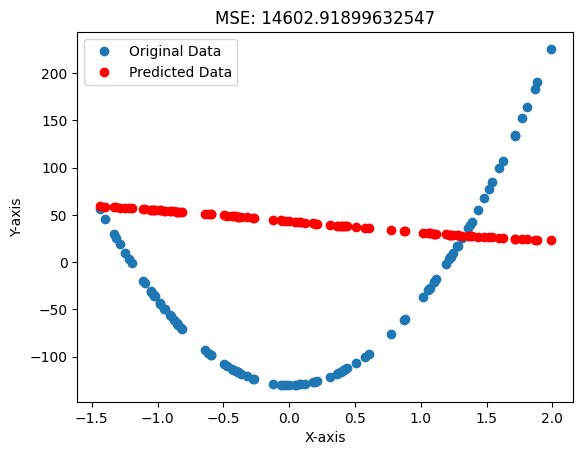

In [118]:
network = MLP([1,5,1], [sigmoid, identity])
train = pd.read_csv("data/regression/square-simple-training.csv")
test = pd.read_csv("data/regression/square-simple-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
MSE = sum((Y_test - pred)**2)/len(X_train)
plt.plot(X_test, Y_test, 'o', label='Original Data')
plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"MSE: {MSE}")
plt.legend()

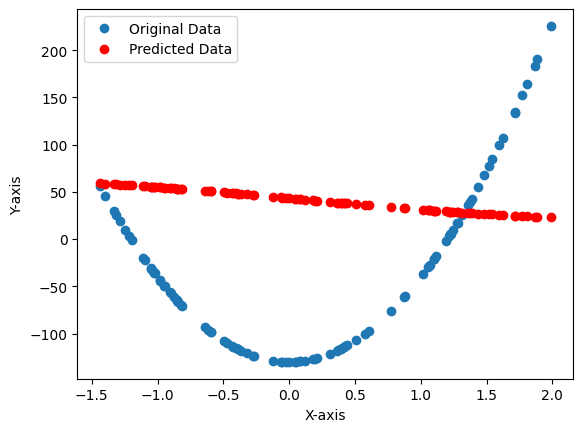

In [119]:
plt.plot(X_test, Y_test, 'o', label='Original Data')
plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()

Weights, epoch: 0, MSE: 14602.91899632547
Weights, epoch: 100, MSE: 19.631315877073064
Weights, epoch: 200, MSE: 3.037183844257671
Weights, epoch: 300, MSE: 1.639868292119036
Weights, epoch: 400, MSE: 2.0291303072551408
Weights, epoch: 500, MSE: 1.1520329322910208
Weights, epoch: 600, MSE: 1.258445353066531
Weights, epoch: 700, MSE: 1.2890037539214165
Weights, epoch: 746, MSE: 0.9934593404870908


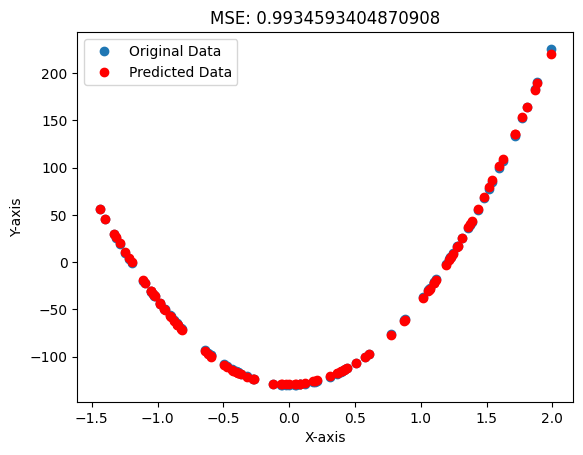

In [120]:
learn_with_val_vis(data, network, 1, 0.1, 100, 0.9,  1)

# 1.2 STL momentum

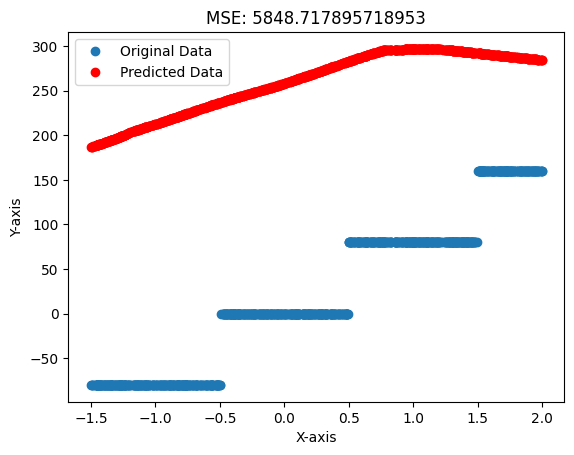

In [131]:
network = MLP([1, 10, 5, 1], [soft_relu, sigmoid, identity])
train = pd.read_csv("data/regression/steps-large-training.csv")
test = pd.read_csv("data/regression/steps-large-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

pred = network.predict_multiple(X_ts_scl.reshape(-1, 1)).reshape(-1) * y_scl + avgy
MSE = sum((Y_test - pred) ** 2) / len(X_train)
plt.plot(X_test, Y_test, 'o', label='Original Data')
plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"MSE: {MSE}")
plt.legend()


Weights, epoch: 0, MSE: 5848.717895718953
Weights, epoch: 100, MSE: 13.149861387194814
Weights, epoch: 200, MSE: 11.468808372798863
Weights, epoch: 300, MSE: 9.169611528714507
Weights, epoch: 400, MSE: 7.86375925502066
Weights, epoch: 500, MSE: 7.414765231683569
Weights, epoch: 600, MSE: 6.198031137652043
Weights, epoch: 700, MSE: 6.179868330747992
Weights, epoch: 800, MSE: 5.471370647926995
Weights, epoch: 900, MSE: 5.165333440665235
Weights, epoch: 1000, MSE: 4.630451914483686
Weights, epoch: 1100, MSE: 4.541535080215107
Weights, epoch: 1200, MSE: 4.11666301374888
Weights, epoch: 1300, MSE: 4.190795255373041
Weights, epoch: 1400, MSE: 3.8032131604395305
Weights, epoch: 1500, MSE: 3.724874196945454
Weights, epoch: 1600, MSE: 3.55695392517789
Weights, epoch: 1700, MSE: 3.6877874568956575
Weights, epoch: 1800, MSE: 3.5863323777690996
Weights, epoch: 1900, MSE: 3.240913203722182
Weights, epoch: 2000, MSE: 3.4731996855364056
Weights, epoch: 2100, MSE: 3.2051310210422987
Weights, epoch: 21

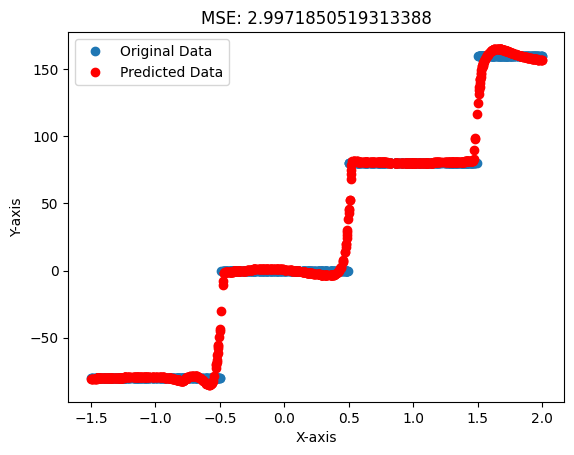

In [132]:
learn_with_val_vis(data, network, 3, 0.01, 100, 0.9, 5, 2500)

# 1.3 MML momentum

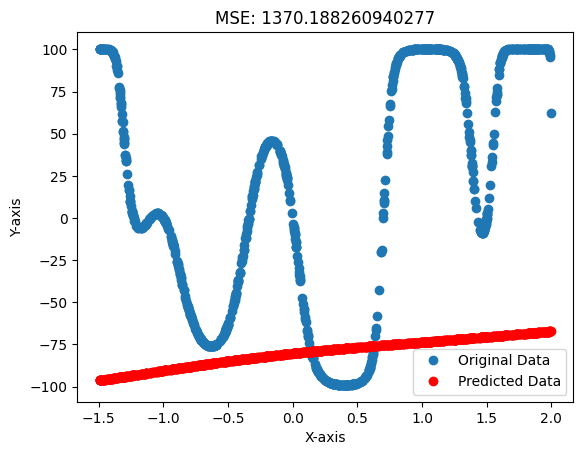

In [138]:
network = MLP([1, 5, 5, 1], [sigmoid, sigmoid, identity])
train = pd.read_csv("data/regression/multimodal-large-training.csv")
test = pd.read_csv("data/regression/multimodal-large-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

pred = network.predict_multiple(X_ts_scl.reshape(-1, 1)).reshape(-1) * y_scl + avgy
MSE = sum((Y_test - pred) ** 2) / len(X_train)
plt.plot(X_test, Y_test, 'o', label='Original Data')
plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"MSE: {MSE}")
plt.legend()

Weights, epoch: 0, MSE: 2.9706710178586517
Weights, epoch: 100, MSE: 2.765844137171315
Weights, epoch: 200, MSE: 1.8781598251508869
Weights, epoch: 300, MSE: 1.557937702952048
Weights, epoch: 400, MSE: 1.3853122182980864
Weights, epoch: 500, MSE: 1.3513540534015338
Weights, epoch: 600, MSE: 1.1342637223113763
Weights, epoch: 700, MSE: 1.120722709721629
Weights, epoch: 780, MSE: 0.9964550916417376


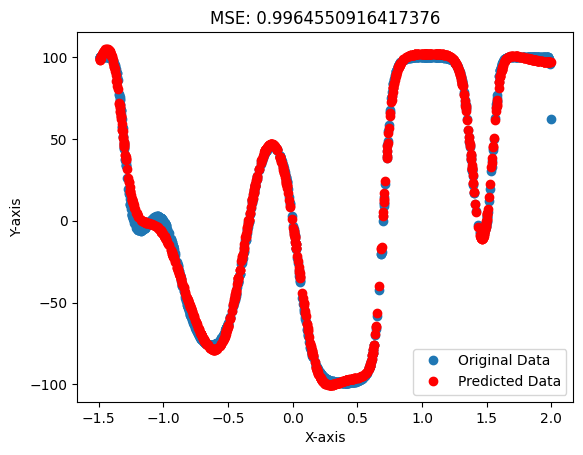

In [140]:
learn_with_val_vis(data, network, 1, 0.1, 100, 0.9, 5, 2500)

# 2.1 SQS rmsprop

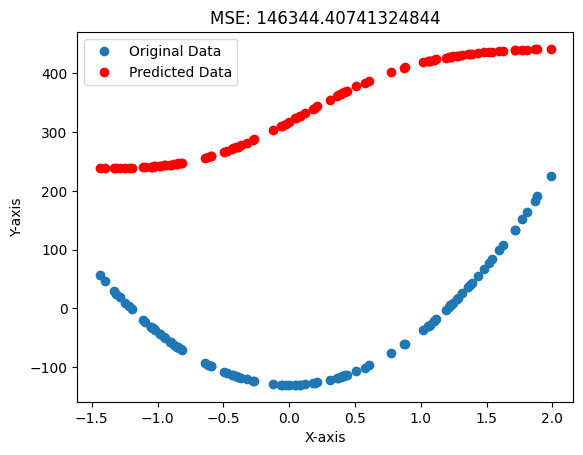

In [36]:
network = MLP([1,5,1], [sigmoid, identity])
train = pd.read_csv("data/regression/square-simple-training.csv")
test = pd.read_csv("data/regression/square-simple-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
MSE = sum((Y_test - pred)**2)/len(X_train)
plt.plot(X_test, Y_test, 'o', label='Original Data')
plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"MSE: {MSE}")
plt.legend()

Weights, epoch: 0, MSE: 146344.40741324844
Weights, epoch: 100, MSE: 562.3459963283576
Weights, epoch: 200, MSE: 146.69204664194424
Weights, epoch: 300, MSE: 122.24120040817881
Weights, epoch: 400, MSE: 105.34383875036508
Weights, epoch: 500, MSE: 75.09577229210376
Weights, epoch: 600, MSE: 71.75793639689168
Weights, epoch: 700, MSE: 54.6424294317357
Weights, epoch: 800, MSE: 47.49380896542166
Weights, epoch: 900, MSE: 42.094827269485215
Weights, epoch: 1000, MSE: 32.03984397253132
Weights, epoch: 1100, MSE: 31.75803636866098
Weights, epoch: 1200, MSE: 26.601710031403773
Weights, epoch: 1300, MSE: 24.78119222600432
Weights, epoch: 1400, MSE: 20.932502734555637
Weights, epoch: 1500, MSE: 20.0787694103217
Weights, epoch: 1600, MSE: 15.129503370523791
Weights, epoch: 1700, MSE: 16.77385703691965
Weights, epoch: 1800, MSE: 12.916192849348564
Weights, epoch: 1900, MSE: 12.467627484110542
Weights, epoch: 2000, MSE: 9.705797232049928
Weights, epoch: 2100, MSE: 9.322360310210751
Weights, epoch

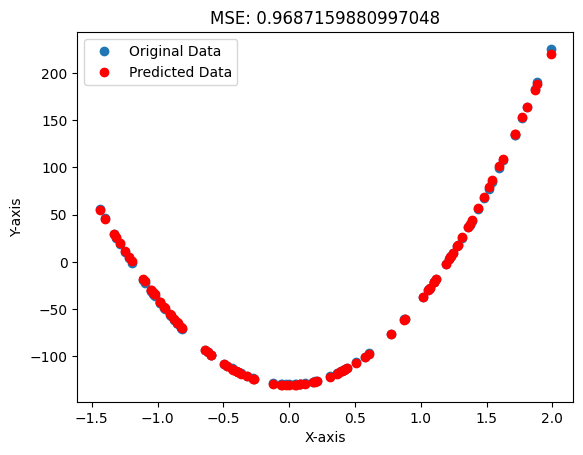

In [37]:
learn_with_val_vis_rms(data, network, 1, 0.001, 100, 0.9,  1)

# 2.2 STL rmsprop

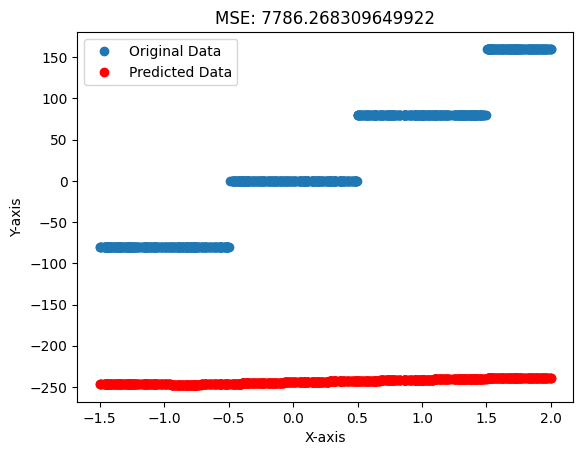

In [38]:
network = MLP([1, 10, 5, 1], [soft_relu, sigmoid, identity])
train = pd.read_csv("data/regression/steps-large-training.csv")
test = pd.read_csv("data/regression/steps-large-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

pred = network.predict_multiple(X_ts_scl.reshape(-1, 1)).reshape(-1) * y_scl + avgy
MSE = sum((Y_test - pred) ** 2) / len(X_train)
plt.plot(X_test, Y_test, 'o', label='Original Data')
plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"MSE: {MSE}")
plt.legend()


Weights, epoch: 0, MSE: 7786.268309649922
Weights, epoch: 100, MSE: 35.1596187664426
Weights, epoch: 200, MSE: 32.96074170838144
Weights, epoch: 300, MSE: 28.159286661164668
Weights, epoch: 400, MSE: 23.488520861218667
Weights, epoch: 500, MSE: 12.05280388033474
Weights, epoch: 600, MSE: 11.322632993130016
Weights, epoch: 700, MSE: 10.300502245174336
Weights, epoch: 800, MSE: 10.284714384002836
Weights, epoch: 900, MSE: 9.872645279748626
Weights, epoch: 1000, MSE: 9.09187203756455
Weights, epoch: 1100, MSE: 8.7295195162982
Weights, epoch: 1200, MSE: 8.443595091576528
Weights, epoch: 1300, MSE: 7.844316165105393
Weights, epoch: 1400, MSE: 7.482080821797329
Weights, epoch: 1500, MSE: 6.996835796370561
Weights, epoch: 1600, MSE: 6.932148906031934
Weights, epoch: 1700, MSE: 6.838242184984441
Weights, epoch: 1800, MSE: 6.960997915353429
Weights, epoch: 1900, MSE: 6.252155408272815
Weights, epoch: 2000, MSE: 6.2116741823341854
Weights, epoch: 2100, MSE: 6.340157081956343
Weights, epoch: 2200

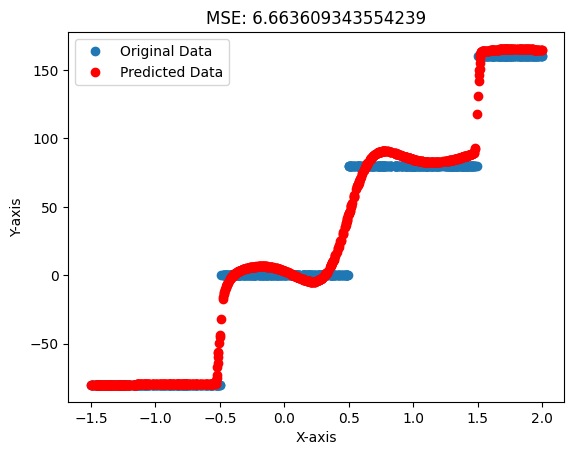

In [39]:
learn_with_val_vis(data, network, 3, 0.01, 100, 0.9, 5, 2500)

# 2.3 MML rmsprop

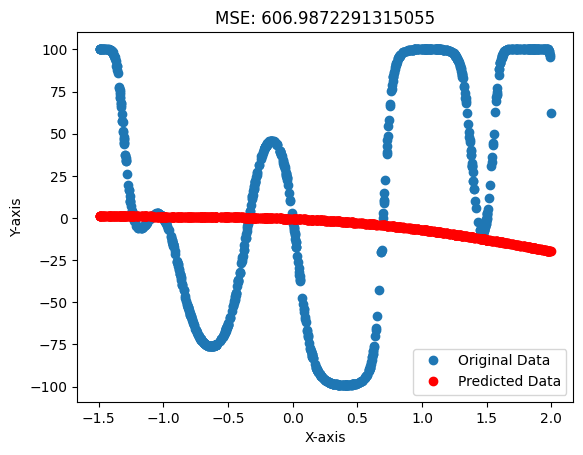

In [40]:
network = MLP([1, 5, 5, 1], [sigmoid, sigmoid, identity])
train = pd.read_csv("data/regression/multimodal-large-training.csv")
test = pd.read_csv("data/regression/multimodal-large-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

pred = network.predict_multiple(X_ts_scl.reshape(-1, 1)).reshape(-1) * y_scl + avgy
MSE = sum((Y_test - pred) ** 2) / len(X_train)
plt.plot(X_test, Y_test, 'o', label='Original Data')
plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"MSE: {MSE}")
plt.legend()

Weights, epoch: 0, MSE: 606.9872291315055
Weights, epoch: 100, MSE: 5.259712515785418
Weights, epoch: 200, MSE: 5.446739312064316
Weights, epoch: 300, MSE: 4.546174497138256
Weights, epoch: 400, MSE: 3.7852109528955022
Weights, epoch: 500, MSE: 2.346148772909468
Weights, epoch: 600, MSE: 7.27640792167543
Weights, epoch: 700, MSE: 2.731926150487164
Weights, epoch: 800, MSE: 2.7653251045048672
Weights, epoch: 900, MSE: 2.427584264704788
Weights, epoch: 1000, MSE: 2.9945366746392774
Weights, epoch: 1100, MSE: 2.1499660490406827
Weights, epoch: 1200, MSE: 13.096508584755181
Weights, epoch: 1300, MSE: 2.2465759579231084
Weights, epoch: 1400, MSE: 3.088443320858961
Weights, epoch: 1500, MSE: 2.3574443359799764
Weights, epoch: 1600, MSE: 1.67784349880658
Weights, epoch: 1700, MSE: 1.909197696494461
Weights, epoch: 1800, MSE: 6.247630811342198
Weights, epoch: 1900, MSE: 1.5864188795918055
Weights, epoch: 2000, MSE: 1.810767271789702
Weights, epoch: 2100, MSE: 1.580531542579573
Weights, epoch: 

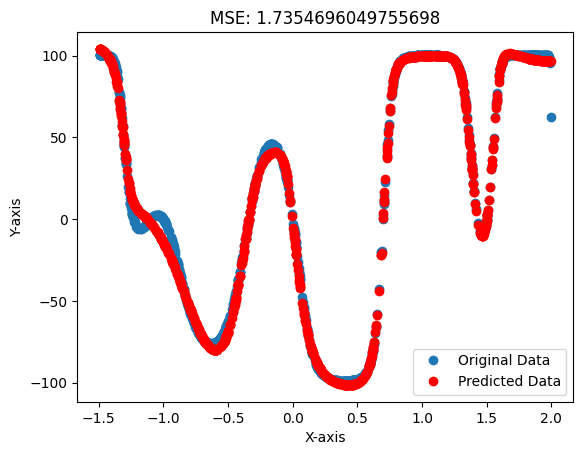

In [42]:
learn_with_val_vis_rms(data, network, 1, 0.1, 100, 0.9, 5, 2500)